---
# _Final report: Wine Quality "Warm up" Challenge_
### Physicochemical factors that predict good quality wine
---


**Names**: ARRIAU Emma, GUIGA Chloé, LUSCAN Pierre, MOSCHINI Irina

## Overview
As the title of the challenge says, this challenge is a "Warm  up". Thus, we decided to fix a different objective from the usual goals set by the Kaggle's competitors. We want to find the model that gives the best score on the testing set only among the basic algorithms we studied in Malis, to have a "recap" of what we learnt. 

This report will be separated into 3 parts. The first part is about the data preparation. Then, in the second part, we try several basics algorithms and report the scores we obtained. Finally, we will conclude by applying the best model on the testing set (even if we don't expect incredible results as we try the basic algorithms).

In [0]:
# Importations
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing the initial dataset for the red wine

winequality_red = pd.read_csv('/content/drive/My Drive/winequality-red.csv',delimiter=';')

In [0]:
# Importing the inputs and output

Xtrain = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xtrain.csv').drop(columns=['Unnamed: 0'])
Xtest = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xtest.csv').drop(columns=['Unnamed: 0'])
Xvalid = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xvalid.csv').drop(columns=['Unnamed: 0'])

ytrain = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/ytrain.csv').drop(columns=['Unnamed: 0'])
ytest = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/ytest.csv').drop(columns=['Unnamed: 0'])
yvalid = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/yvalid.csv').drop(columns=['Unnamed: 0'])

ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)
yvalid = np.ravel(yvalid)

# Importing the inputs and output with PCA

Xtrain_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xtrain_pca.csv').drop(columns=['Unnamed: 0'])
Xtest_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xtest_pca.csv').drop(columns=['Unnamed: 0'])
Xvalid_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xvalid_pca.csv').drop(columns=['Unnamed: 0'])

ytrain_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/ytrain_pca.csv').drop(columns=['Unnamed: 0'])
ytest_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/ytest_pca.csv').drop(columns=['Unnamed: 0'])
yvalid_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/yvalid_pca.csv').drop(columns=['Unnamed: 0'])

ytrain_pca = np.ravel(ytrain_pca)
ytest_pca = np.ravel(ytest_pca)
yvalid_pca = np.ravel(yvalid_pca)

# 1. Data preparation

Concerning the data preparation, we followed some essential steps to understand the characteristics of our dataset which include data cleaning, data visualization through descriptive statisics and data pre-processing. 

At first, we  visualized some statistics to understand how the data was distributed and especially how the quality (our output) was behaving. We noticed thanks to a histogram plot that a large marjority of the values of the quality were either 5 or 6 out of 10. Thus, we decided to handle a binary classification problem : a quality equal to 1 if the initial quality is greater than or equal to 6, and 0 otherwise. 

Let's visualize the distributions and the correlations in our dataset.


In [0]:
#dropping duplicates and re-indexing properly the dataset

winequality_red = winequality_red.drop_duplicates()
winequality_red = winequality_red.reset_index(drop=True) 

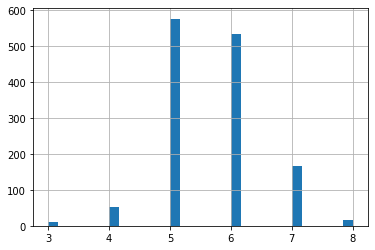

In [0]:
#plotting the histogram for quantity

length = winequality_red['quality']
fig = plt.figure() 
length.hist(bins=30)

Comment of the plot : As said before, we can clearly see that quantity is mostly spread between either 5 or 6. This explain our threshold of 6 for assesing the good/bad quality of the wines.

Once our problem defined, we proceeded to the next steps such as handling inconsistent values or normalizing the data because of the different ranges taken by the values of the features. We also handled the possible outliers spotted with the previous statistics by resorting to the zscore metrics. Eventually, the descriptive statistics revealed some correlations between the features so that we wanted to try a Principal Component Analysis (PCA) in order compare the results with and without PCA on few algorithms and this way, to warm-up on this technique.

Let us visualize the correlation between some features and the possible outliers of the dataset.

Text(0, 0.5, 'fixed acidity')

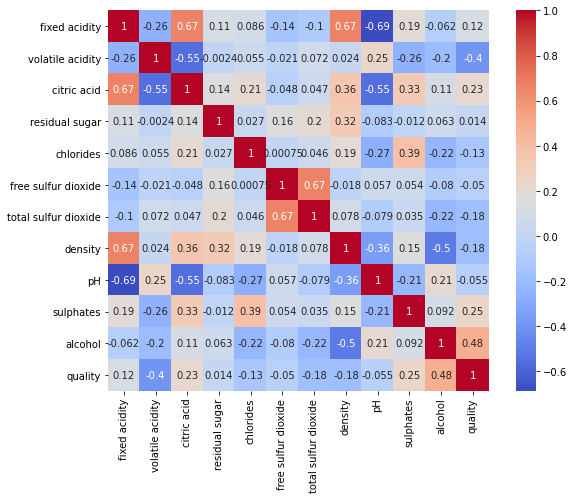

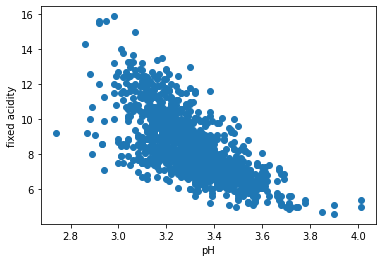

In [0]:
#heatmap to visualize the correlations between our features
corr = winequality_red.corr()
_, ax = plt.subplots(figsize=(10, 7))
ax = sn.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.figure()

#correlation between pH and fixed acidity (correlation coefficient given by the scatter matrix : -0.69)

plt.scatter(winequality_red['pH'], winequality_red['fixed acidity'])
plt.xlabel('pH')
plt.ylabel('fixed acidity')

Comment of the plots : Thanks to the first plot we can visualize pairwise correlation of all features of the dataset. The highest coeffcients (0.67, 0.69 for example) indicate a strong linear relationship thus we can infer that there is a redundancy of information within the dataset. This is why we will try a Principal Components Analysis (PCA) later on even if the initial dimensionality is not excessively high (11 features).

As you will see in the scratch notebook, we yielded the following results after going through the PCA : the first principal component (PC1) contains 94.8% of the information carried by the data set and the second principal component (PC2) contains 99.5% of the information. This is why PCA could be interesting in our case.


Now let us move to the outliers.

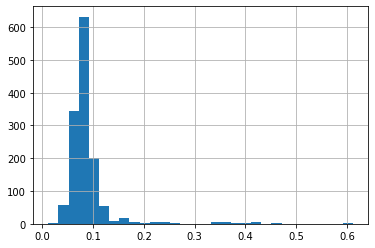

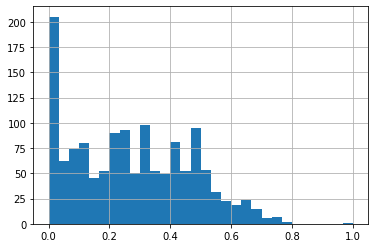

In [0]:
##plotting the histogram for chlorides and citric acid

length = winequality_red['chlorides']
fig = plt.figure() 
length.hist(bins=30)

length = winequality_red['citric acid']
fig = plt.figure() 
length.hist(bins=30)

Comment of the plot : We can see that the datapoint(s) with a chlorides value of 0.6 is probably an outlier with regards to this feature and same for the point with a citric acid level equal to 1. In the scratch notebook we also plotted the box plots to have a better representation of the variabilty along the features. Here is the box plot for the citric acid feature that also show the outliers at 1 for a quality of 4.

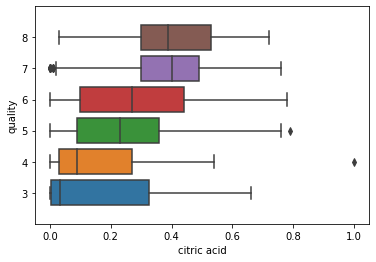

In [0]:
data = pd.concat([winequality_red['citric acid'],winequality_red['quality']], axis=1)
fig1=sn.boxplot(x='citric acid', y="quality", data=data,orient="h")
fig1.axis(ymin=-1, ymax=6);
plt.show()

To conclude on outliers, our policy was to delete all the samples of our dataset that had outliers in at least one column (i.e feature) using the zscore metrics with the common threshold of 3 as you will find in the scratch notebook.

# 2. Models

We decided to try basics algorithms and tune parameters to have, for each model, the best results. We tried 7 algorihtms, from the simpliest ones to more complex models: KNN, logistic regression for classification, decision trees, SVM (with 4 different kernels), random forests, gradient boosted regression trees and a neural network. 

We are conscious that the neural network is not really adapted to our problem as we don't have a lot of data. However, as our goal is to have a "warm-up", we implemented one neural network to rembember how it works. 

We also wanted to see the impact of having applied PCA on the dataset. So the firsts algorithms have been tested with both datasets: the one without PCA applied, and the one with PCA applied. 

To not burden this report, we will show how we proceeded for KNN only, and we will give the results obtained for each algorithms. If you want to see the code, you can find it in the _scratch notebook_.

### 2.a. The way we proceed on an example: KNN

As said before, our goal is to try basic algorithms and tune parameters. Thus, for KNN, we will train this model with different number of nearest neighbors, and keep the one that <b>minimizes the log loss</b>, as it is this measure we have to optimize. Moreover, as the accuracy is very meaningful, we will display also this measure.  We will finally try KNN algorithm on both datasets.

#### 2.a.i. Dataset without PCA

Let's try firstly KNN on the dataset on which PCA has not been applied. 

In [0]:
# KNN on the dataset without PCA
n_neighbors = []
log_losses = []
accuracies = []

ytrain = np.ravel(ytrain)

for i in range (1,51):
    n_neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, ytrain)
    y_pred = knn.predict(Xvalid)
    log_loss = sklearn.metrics.log_loss(yvalid, y_pred)
    accuracy = np.mean(y_pred == yvalid)
    log_losses.append(log_loss)
    accuracies.append(accuracy)

In [0]:
min_log_loss = min(log_losses)
n_neigbors = np.argmin(log_losses) + 1
accuracy = accuracies[np.argmin(log_losses)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with ', n_neigbors, ' nearest neighbors')

Minimum log loss on the validation set of 8.36 with an accuracy of 0.7581 obtained with  22  nearest neighbors


Thus, the optimal parameter is 22 nearest neighbors, and allows to have a log loss on the validation set of <b>8.36</b>. The associated accuracy is 75.81%, which is not that bah for KNN algorithm, known to work quite badly.

Let's now try the same algorithm on the other dataset: the one on which PCA has been applied. 

#### 2.a.ii. Dataset with PCA

In [0]:
# KNN on the dataset with PCA
n_neighbors_pca = []
log_losses_pca = []
accuracies_pca = []

for i in range (1,51):
    n_neighbors_pca.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain_pca, ytrain_pca)
    y_pred = knn.predict(Xvalid_pca)
    log_loss_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred)
    accuracy_pca = np.mean(y_pred == yvalid_pca)
    log_losses_pca.append(log_loss_pca)
    accuracies_pca.append(accuracy_pca)

In [0]:
min_log_loss_pca = min(log_losses_pca)
n_neigbors_pca = np.argmin(log_losses_pca) + 1
accuracy_pca = accuracies_pca[np.argmin(log_losses_pca)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss_pca, 'with an accuracy of %.4f' % accuracy_pca,  'obtained with ', n_neigbors_pca, ' nearest neighbors')

Minimum log loss on the validation set of 13.46 with an accuracy of 0.6103 obtained with  6  nearest neighbors


On the dataset with PCA, KNN works badly. With a minimum log loss of <b>13.46</b> (compared to 8.36 on the dataset without PCA), and a corresponding accuracy of 61.03% (compared to 75.81%), the results are much less good. 

It can be explained by the fact that PCA reduces the dimension of the input features, and thus loses information. KNN need as much information as possible to work well. Thus, PCA is not well adapted to KNN. 


#### 2.a.iii. Comparison of the results

Let's plot the log losses obtained for both datasets with respect to the number of neighbors used.

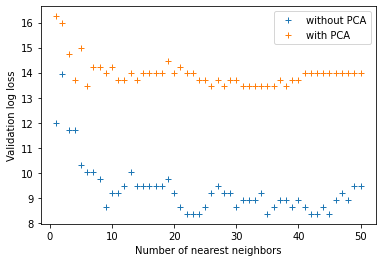

In [0]:
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation log loss')
plt.plot(n_neighbors, log_losses, '+', label = "without PCA")
plt.plot(n_neighbors, log_losses_pca, '+', label = "with PCA")
plt.legend()
plt.show()

As expected, the log losses are significantly better when PCA is not applied. 

**_Recap_:** To conclude with KNN algorithm, after having tuned the parameter (number of neighbors o consider) and tried the algorithm on both datasets, **we finally keep the result obtained with the dataset without PCA, and 22 nearest neighbors**. 

### 2.b. Results

We saw in the part 2.a. the way we proceeded with the example of KNN. Let's now have a look at the results we obtained with the different methods we implemented. 

Concerning the datasets, as there as not a lot of features, we decided to pursue with the dataset without PCA to keep as much information as we can. Thus, the following results are obtained without having applied PCA.

_Remark: As said before, you can see the code in the scratch notebook._

In [0]:
data = [[8.36, '75.81%', 'n_neighbors = 22', '-'], [6.68, '80.65%', 'regularization param = 4', '-'], [7.24, '79.03%', 'max depth = 4', '-'], [6.41, '81.45%', 'n_trees = 25', '-'], [6.41, '81.45%', 'max depth = 2', '-'], ['8.08', '76.61%', '-', '-'], ['7.80', '77.42%', '-', '-'], ['7.80', '77.42%', '-', '-'], ['15.9', '54.03%', '-', '-'], ['6.69', '80.65%', 'regularization param = 0.01', 'hidden_layer_sizes = 70']]
results = pd.DataFrame(data, columns=['Validation log loss', 'Validation accuracy', 'Tuned parameters 1', 'Tuned parameters 2'], index=['KNN', 'Logistic regression', 'Decision tree', 'Random forests', 'GBRT', 'SVM rbf','SVM linear','SVM poly','SVM sigmoid', 'Neural network'])

results

,Validation log loss,Validation accuracy,Tuned parameters 1,Tuned parameters 2
KNN,8.36,75.81%,n_neighbors = 22,-
Logistic regression,6.68,80.65%,regularization param = 4,-
Decision tree,7.24,79.03%,max depth = 4,-
Random forests,6.41,81.45%,n_trees = 25,-
GBRT,6.41,81.45%,max depth = 2,-
SVM rbf,8.08,76.61%,-,-
SVM linear,7.80,77.42%,-,-
SVM poly,7.80,77.42%,-,-
SVM sigmoid,15.9,54.03%,-,-
Neural network,6.69,80.65%,regularization param = 0.01,hidden_layer_sizes = 70


This table recap the minimum log losses we found on the validation set after having tuned the parameters of each method. The associated accuracy and the optimal parameter(s) we found are also displayed. 

We can see that the random forests is doing the best job on our dataset, with a log loss of **6.41**. Some other models also work well, such as the gradient boosted regression tree (log loss of **6.41**), the logistic regression (log loss of **6.68**) and also the neural network (log loss of **6.69**).

### 2.c. Model selection

As we obtained good results with different models, instead of taking only the model that gives the best log loss, our idea is to **merge the best models**, that is to say that we take the predominent class among the 4 algorithms. The code is available at the section *3. Model selection and merging the results* of the scratch notebook.

*Example: if we obtained, for a given wine, 3 "zero" and 1 "one", our wine will finally  be classified as a "zero" wine.*

- Merging the 4 best models (random forests, GBRT and logistic regression, neural network) gives us a log loss of **6.68**, which is not better than the what we obtained with random forests lonely. 

- Because the previous result is not that good, we merge only the 3 best models (random forests, GBRT and logistic regression), which gives a log loss of **6.13**, the best result until now! Thus, this is the model we keep.

**To conclude, the best model is the one that takes the majoritary class among  the Logistic regression, random forests and Gradient boosted regression tree.**

# 3. Conclusion

As the main goal of a challenge is to optimize a given measure (minimize the log loss in our case) for any data, seen or unseen data, let's see how the model we kept works on the testing set (which constitues totally unseen data as we didn't work on this set until now). The code is available at the section *4. Testing and conclusion* of the scratch notebook.

It finally gives a log loss of **9.99** (compared to 6.13 on the validation set), and an associated accuracy of 71.08% (compared to 82.26%). 

As we worked only on the red dataset (based on the assumption that we know the color of the wine), we would have done exactly the same on the white dataset. 